# Group Project - Heart Disease Prediction 1

In [1]:
import os, re
curPath = os.getcwd()
match = re.search(pattern=r"^.+?WQD7003_DataAnalytics", string=curPath, flags=re.IGNORECASE)
rootPath = match.group()
os.chdir(rootPath)
os.getcwd()

'd:\\Administration\\Universities\\UniMalaya\\MCS-AC\\WQD7003_DataAnalytics'

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier

In [3]:
from scripts.custom import inspect_df_na

In [4]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns", None)

In [5]:
DataFilePath = "./data/heart_2022_with_nans.csv"
DataDir = "./data/"
PlotsDir = "./plots/"
ModelsDir = "./models/"

### Data
- Data Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/

In [6]:
df = pd.read_csv(DataFilePath)

In [7]:
df.dtypes

State                  object
Sex                    object
GeneralHealth          object
PhysicalHealthDays    float64
MentalHealthDays      float64
                       ...   
FluVaxLast12           object
PneumoVaxEver          object
TetanusLast10Tdap      object
HighRiskLastYear       object
CovidPos               object
Length: 40, dtype: object

In [8]:
df.columns[(df.dtypes == 'float64')]

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

In [9]:
df[df.columns[(df.dtypes == 'float64')]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PhysicalHealthDays  434205 non-null  float64
 1   MentalHealthDays    436065 non-null  float64
 2   SleepHours          439679 non-null  float64
 3   HeightInMeters      416480 non-null  float64
 4   WeightInKilograms   403054 non-null  float64
 5   BMI                 396326 non-null  float64
dtypes: float64(6)
memory usage: 20.4 MB


In [10]:
df[df.columns[(df.dtypes == 'object')]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State                      445132 non-null  object
 1   Sex                        445132 non-null  object
 2   GeneralHealth              443934 non-null  object
 3   LastCheckupTime            436824 non-null  object
 4   PhysicalActivities         444039 non-null  object
 5   RemovedTeeth               433772 non-null  object
 6   HadHeartAttack             442067 non-null  object
 7   HadAngina                  440727 non-null  object
 8   HadStroke                  443575 non-null  object
 9   HadAsthma                  443359 non-null  object
 10  HadSkinCancer              441989 non-null  object
 11  HadCOPD                    442913 non-null  object
 12  HadDepressiveDisorder      442320 non-null  object
 13  HadKidneyDisease           443206 non-null  

In [11]:
for i in enumerate(df.columns, 0):
    print(i)

(0, 'State')
(1, 'Sex')
(2, 'GeneralHealth')
(3, 'PhysicalHealthDays')
(4, 'MentalHealthDays')
(5, 'LastCheckupTime')
(6, 'PhysicalActivities')
(7, 'SleepHours')
(8, 'RemovedTeeth')
(9, 'HadHeartAttack')
(10, 'HadAngina')
(11, 'HadStroke')
(12, 'HadAsthma')
(13, 'HadSkinCancer')
(14, 'HadCOPD')
(15, 'HadDepressiveDisorder')
(16, 'HadKidneyDisease')
(17, 'HadArthritis')
(18, 'HadDiabetes')
(19, 'DeafOrHardOfHearing')
(20, 'BlindOrVisionDifficulty')
(21, 'DifficultyConcentrating')
(22, 'DifficultyWalking')
(23, 'DifficultyDressingBathing')
(24, 'DifficultyErrands')
(25, 'SmokerStatus')
(26, 'ECigaretteUsage')
(27, 'ChestScan')
(28, 'RaceEthnicityCategory')
(29, 'AgeCategory')
(30, 'HeightInMeters')
(31, 'WeightInKilograms')
(32, 'BMI')
(33, 'AlcoholDrinkers')
(34, 'HIVTesting')
(35, 'FluVaxLast12')
(36, 'PneumoVaxEver')
(37, 'TetanusLast10Tdap')
(38, 'HighRiskLastYear')
(39, 'CovidPos')


In [12]:
# colsName = df.columns.to_numpy()
# df_colsName = df.columns.to_frame()
# df_colsName.reset_index(drop=True,).rename(columns={0:'Columns'}).to_csv('heart_2022_columns.csv')
df_colsName = pd.read_csv('heart_2022_columns.csv', index_col='Index')

In [13]:
colsName_selected = df_colsName['Columns'][(df_colsName['Drop'] == False)].reset_index(drop=True)

In [14]:
df_1 = df.loc[:, colsName_selected]
df_1.to_csv("project_data_1.csv",index=False)
df_1

Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0       Female     Very good                 0.0               0.0   
1       Female     Excellent                 0.0               0.0   
2       Female     Very good                 2.0               3.0   
3       Female     Excellent                 0.0               0.0   
4       Female          Fair                 2.0               0.0   
...        ...           ...                 ...               ...   
445127  Female          Good                 0.0               3.0   
445128  Female     Excellent                 2.0               2.0   
445129  Female          Poor                30.0              30.0   
445130    Male     Very good                 0.0               0.0   
445131    Male     Very good                 0.0               1.0   

       PhysicalActivities  SleepHours HadHeartAttack HadAngina HadStroke  \
0                      No         8.0             No        No        No   
1                      No         6.0             No        No        No   
2                     Yes         5.0             No        No        No   
3                     Yes         7.0             No        No        No   
4                     Yes         9.0             No        No        No   
...                   ...         ...            ...       ...       ...   
445127                Yes         6.0             No        No        No   
445128                Yes         7.0             No        No        No   
445129                 No         5.0             No        No        No   
445130                 No         5.0            Yes        No        No   
445131                Yes         5.0             No        No        No   

       HadAsthma HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease  \
0             No            No      No                    No               No   
1             No           Yes      No                    No               No   
2             No           Yes      No                    No               No   
3            Yes            No      No                    No               No   
4             No            No      No                    No               No   
...          ...           ...     ...                   ...              ...   
445127       Yes            No      No                   Yes               No   
445128        No            No      No                    No               No   
445129        No            No      No                    No               No   
445130       Yes            No      No                    No               No   
445131        No            No      No                    No               No   

       HadArthritis HadDiabetes                           SmokerStatus  \
0                No         Yes                           Never smoked   
1                No          No                           Never smoked   
2                No          No                           Never smoked   
3               Yes          No  Current smoker - now smokes some days   
4                No          No                           Never smoked   
...             ...         ...                                    ...   
445127           No          No                           Never smoked   
445128           No          No                           Never smoked   
445129           No          No  Current smoker - now smokes every day   
445130           No          No                           Never smoked   
445131           No          No                          Former smoker   

                                  ECigaretteUsage     RaceEthnicityCategory  \
0                          Not at all (right now)  White only, Non-Hispanic   
1       Never used e-cigarettes in my entire life  White only, Non-Hispanic   
2       Never used e-cigarettes in my entire life  White only, Non-Hispanic   
3       Never used e-cigarettes in my entire life  White only, Non-Hispanic   


In [15]:
df_1.dtypes.to_frame()[0][(df_1.dtypes.to_frame()[0] == 'float64')].index.tolist()

['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']

In [16]:
df_1.dtypes.to_frame()[0][(df_1.dtypes.to_frame()[0] != 'float64')].index.tolist()

['Sex',
 'GeneralHealth',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'SmokerStatus',
 'ECigaretteUsage',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers']

In [17]:
numerical_features = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']
categorical_features = ['Sex',
 'GeneralHealth',
 'PhysicalActivities',
#  'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'SmokerStatus',
 'ECigaretteUsage',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers']
target = ['HadHeartAttack']

# Count of Data 

In [18]:
df_count = df_1.groupby('HadHeartAttack').count()
df_count_1 = df_1.groupby('HadHeartAttack').count().reset_index()
df_count

Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
HadHeartAttack                                                                
No              416959         415977              407324            408870   
Yes              25108          24995               24146             24405   

                PhysicalActivities  SleepHours  HadAngina  HadStroke  \
HadHeartAttack                                                         
No                          416078      412280     414600     416091   
Yes                          25017       24591      23879      24906   

                HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  \
HadHeartAttack                                                             
No                 415629         414494   415341                 414717   
Yes                 25001          24809    24888                  24929   

                HadKidneyDisease  HadArthritis  HadDiabetes  SmokerStatus  \
HadHeartAttack                                                              
No                        415557        414795       416223        383902   
Yes                        24896         24959        25031         23224   

                ECigaretteUsage  RaceEthnicityCategory  AgeCategory     BMI  \
HadHeartAttack                                                                
No                       383785                 404126       408512  370922   
Yes                       23139                  24243        24748   23035   

                AlcoholDrinkers  
HadHeartAttack                   
No                       373549  
Yes                       22581

In [19]:
fig = px.bar(df_count,
             text='value')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    title = 'Count of Data Grouped by Features',
    xaxis_title = 'Heart Disease',
    yaxis_title = 'Data Count',
    barmode='group',
    bargap=0.1,
    bargroupgap=0.2,
)


fig.show()
# app = Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])
# app.run()

# Numerical Data Box Plot
http://127.0.0.1:8052

In [ ]:
app = Dash(name='app_1')

app.layout = html.Div([
    html.H4("Analysis of the numerical data with categorical data"),
    html.P("x-axis:"),
    dcc.RadioItems(
        id='x-axis', 
        options=categorical_features+target,
        value='HadHeartAttack', 
        inline=True
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=numerical_features,
        value='BMI', 
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("x-axis", "value"), 
    Input("y-axis", "value"))
def generate_chart(x, y):
    df = df_1 # replace with your own data source
    fig = px.box(df, x=x, y=y)
    return fig


app.run_server(debug=True,port=8051)

127.0.0.1 - - [01/Jan/2024 22:34:57] code 400, message Bad request version ('eê')
127.0.0.1 - - [01/Jan/2024 22:34:57] code 400, message Bad request version ('\x8a\x8a\x13\x01\x13\x02\x13\x03À+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01\x93ÊÊ\x00\x00\x00')
127.0.0.1 - - [01/Jan/2024 22:34:57] code 400, message Bad request version ('×Ì¯/f')
127.0.0.1 - - [01/Jan/2024 22:34:57] code 400, message Bad request version ('a4JB\x13kÌ\x16\x14¦Ïn\x08\x1bZ4eÿùTN\x80zQ.ó½röë\x18M\x00ÐÏAQ*ÚÈ¨\x8e6\x17\x07CÔ¥"ë,\x949ø')
127.0.0.1 - - [01/Jan/2024 22:34:57] code 400, message Bad request version ('::\x13\x01\x13\x02\x13\x03À+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01Í\x9a\x9a\x00\x00Di\x00\x05\x00\x03\x02h2\x00-\x00\x02\x01\x01\x00\x17\x00\x00\x00+\x00\x07\x06ÊÊ\x03\x04\x03\x03\x00#\x00\x00\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00')
127.0.0.1 - - [01/Jan/2024 22:34:57] code 400, message Bad request version ('\x00\x02\x01\x00Di\x00\x05\x00\x03\x02h2ÿ\x01\x00\x01\x00\x00\x1

### Distribution Plot

In [21]:
fig = px.histogram(df_1, x='PhysicalHealthDays', color='HadHeartAttack')
fig.show()

In [22]:
app = Dash(name='app_2')

app.layout = html.Div([
    html.H4("Analysis of the Distribution"),
    # html.P("Select Distribution:"),
    # dcc.RadioItems(
    #     id='distribution',
    #     options=['box', 'violin', 'rug'],
    #     value='box', inline=True
    # ),
    html.P("Features: "),
    dcc.RadioItems(
        id='x-axis', 
        options=numerical_features+categorical_features,
        value='PhysicalHealthDays', 
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    # Input("distribution", "value"),
    Input("x-axis","value"))
def display_graph(x):
    df = px.data.tips() # replace with your own data source
    fig = px.histogram(
        df_1, x=x, color="HadHeartAttack")
    return fig

# def display_graph(distribution,x):
#     df = px.data.tips() # replace with your own data source
#     fig = px.histogram(
#         df_1, x=x, color="HadAngina",
#         marginal=distribution)
#     return fig

app.run_server(debug=True,port=8051)

In [23]:
inspect_df_na(df_1)

Null values count by columns : 

('Sex', 0)
('GeneralHealth', 1198)
('PhysicalHealthDays', 10927)
('MentalHealthDays', 9067)
('PhysicalActivities', 1093)
('SleepHours', 5453)
('HadHeartAttack', 3065)
('HadAngina', 4405)
('HadStroke', 1557)
('HadAsthma', 1773)
('HadSkinCancer', 3143)
('HadCOPD', 2219)
('HadDepressiveDisorder', 2812)
('HadKidneyDisease', 1926)
('HadArthritis', 2633)
('HadDiabetes', 1087)
('SmokerStatus', 35462)
('ECigaretteUsage', 35660)
('RaceEthnicityCategory', 14057)
('AgeCategory', 9079)
('BMI', 48806)
('AlcoholDrinkers', 46574)
--------------------------------------------

Total number of null values : 241996
--------------------------------------------

The number of row with null values 115469
--------------------------------------------



(97.52886375685905, 74.05960479138773)

### Ordinal Encoding

In [24]:
df_2 = df_1.dropna().reset_index(drop=True)
df_2

Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0       Female     Excellent                 0.0               0.0   
1       Female     Very good                 2.0               3.0   
2       Female          Fair                 2.0               0.0   
3         Male          Poor                 1.0               0.0   
4       Female     Very good                 0.0               0.0   
...        ...           ...                 ...               ...   
329658    Male          Good                 0.0              15.0   
329659    Male          Good                 0.0               0.0   
329660  Female     Excellent                 2.0               2.0   
329661    Male     Very good                 0.0               0.0   
329662    Male     Very good                 0.0               1.0   

       PhysicalActivities  SleepHours HadHeartAttack HadAngina HadStroke  \
0                      No         6.0             No        No        No   
1                     Yes         5.0             No        No        No   
2                     Yes         9.0             No        No        No   
3                      No         7.0            Yes        No       Yes   
4                     Yes         7.0             No        No        No   
...                   ...         ...            ...       ...       ...   
329658                Yes         7.0             No        No       Yes   
329659                Yes         8.0             No        No        No   
329660                Yes         7.0             No        No        No   
329661                 No         5.0            Yes        No        No   
329662                Yes         5.0             No        No        No   

       HadAsthma HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease  \
0             No           Yes      No                    No               No   
1             No           Yes      No                    No               No   
2             No            No      No                    No               No   
3             No            No      No                    No               No   
4             No            No      No                    No               No   
...          ...           ...     ...                   ...              ...   
329658        No            No      No                    No               No   
329659        No            No      No                    No               No   
329660        No            No      No                    No               No   
329661       Yes            No      No                    No               No   
329662        No            No      No                    No               No   

       HadArthritis HadDiabetes   SmokerStatus  \
0                No          No   Never smoked   
1                No          No   Never smoked   
2                No          No   Never smoked   
3                No         Yes   Never smoked   
4                No          No  Former smoker   
...             ...         ...            ...   
329658          Yes         Yes   Never smoked   
329659           No          No   Never smoked   
329660           No          No   Never smoked   
329661           No          No   Never smoked   
329662           No          No  Former smoker   

                                  ECigaretteUsage      RaceEthnicityCategory  \
0       Never used e-cigarettes in my entire life   White only, Non-Hispanic   
1       Never used e-cigarettes in my entire life   White only, Non-Hispanic   
2       Never used e-cigarettes in my entire life   White only, Non-Hispanic   
3       Never used e-cigarettes in my entire life   White only, Non-Hispanic   
4       Never used e-cigarettes in my entire life   Black only, Non-Hispanic   
...                                           ...                        ...   
329658  Never used e-cigarettes in my entire life  Multiracial, Non-Hispanic   
329659  Never used e-cigarettes in my entir

In [25]:
df_2['RaceEthnicityCategory'].unique().tolist()

['White only, Non-Hispanic',
 'Black only, Non-Hispanic',
 'Other race only, Non-Hispanic',
 'Multiracial, Non-Hispanic',
 'Hispanic']

In [26]:
cat_1 = ['Female','Male']
cat_2 = ['Poor','Fair','Good','Very good','Excellent']
cat_3 = ['No','Yes']
cat_4 = ['No','No, pre-diabetes or borderline diabetes','Yes, but only during pregnancy (female)','Yes']
cat_5 = ['Age 18 to 24','Age 25 to 29', 'Age 30 to 34','Age 35 to 39','Age 40 to 44','Age 45 to 49','Age 50 to 54','Age 55 to 59','Age 60 to 64','Age 65 to 69','Age 70 to 74','Age 75 to 79','Age 80 or older']
cat_6 = ['Never smoked','Former smoker','Current smoker - now smokes some days','Current smoker - now smokes every day']
cat_7 = ['Never used e-cigarettes in my entire life','Not at all (right now)','Use them some days','Use them every day']
cat_8 = ['White only, Non-Hispanic','Black only, Non-Hispanic','Other race only, Non-Hispanic','Multiracial, Non-Hispanic','Hispanic'] # onehot encode

In [27]:
# cols_1 = [df_2.columns.get_loc('Sex')]
# cols_2 = [df_2.columns.get_loc('GeneralHealth')]
# cols_3_1 = [df_2.columns.get_loc('PhysicalActivities')]
# cols_3_2 = [df_2.columns.get_loc('HadHeartAttack')]
# cols_3_3 = [df_2.columns.get_loc('HadAngina')]
# cols_3_4 = [df_2.columns.get_loc('HadStroke')]
# cols_3_5 = [df_2.columns.get_loc('HadDepressiveDisorder')]
# cols_3_6 = [df_2.columns.get_loc('AlcoholDrinkers')]
# cols_4 = [df_2.columns.get_loc('HadDiabetes')]
# cols_5 = [df_2.columns.get_loc('AgeCategory')]
cols_1 = ['Sex']
cols_2 = ['GeneralHealth']
cols_3_1 = ['PhysicalActivities']
cols_3_2 = ['HadHeartAttack']
cols_3_3 = ['HadAngina']
cols_3_4 = ['HadStroke']
cols_3_5 = ['HadAsthma']
cols_3_6 = ['HadSkinCancer']
cols_3_7 = ['HadCOPD']
cols_3_8 = ['HadDepressiveDisorder']
cols_3_9 = ['HadKidneyDisease']
cols_3_10 = ['HadArthritis']
cols_3_11 = ['AlcoholDrinkers']
cols_4 = ['HadDiabetes']
cols_5 = ['AgeCategory']
cols_6 = ['SmokerStatus']
cols_7 = ['ECigaretteUsage']
cols_8 = ['RaceEthnicityCategory']
# cat_columns_name = ['Sex','GeneralHealth','PhysicalActivities','HadHeartAttack','HadAngina','HadStroke','HadDepressiveDisorder','AlcoholDrinkers','HadDiabetes','AgeCategory']

In [28]:
transformer = ColumnTransformer(transformers=[
    ('oe_1',OrdinalEncoder(categories=[cat_1]),cols_1),
    ('oe_2',OrdinalEncoder(categories=[cat_2]),cols_2),
    ('oe_3_1',OrdinalEncoder(categories=[cat_3]),cols_3_1),
    ('oe_3_2',OrdinalEncoder(categories=[cat_3]),cols_3_2),
    ('oe_3_3',OrdinalEncoder(categories=[cat_3]),cols_3_3),
    ('oe_3_4',OrdinalEncoder(categories=[cat_3]),cols_3_4),
    ('oe_3_5',OrdinalEncoder(categories=[cat_3]),cols_3_5),
    ('oe_3_6',OrdinalEncoder(categories=[cat_3]),cols_3_6),
    ('oe_3_7',OrdinalEncoder(categories=[cat_3]),cols_3_7),
    ('oe_3_8',OrdinalEncoder(categories=[cat_3]),cols_3_8),
    ('oe_3_9',OrdinalEncoder(categories=[cat_3]),cols_3_9),
    ('oe_3_10',OrdinalEncoder(categories=[cat_3]),cols_3_10),
    ('oe_3_11',OrdinalEncoder(categories=[cat_3]),cols_3_11),
    ('oe_4',OrdinalEncoder(categories=[cat_4]),cols_4),
    ('oe_5',OrdinalEncoder(categories=[cat_5]),cols_5),
    ('oe_6',OrdinalEncoder(categories=[cat_6]),cols_6),
    ('oe_7',OrdinalEncoder(categories=[cat_7]),cols_7),
    ('oe_8',OneHotEncoder(sparse_output=False),cols_8)
], remainder='passthrough')

In [29]:
transformer.fit(df_2)
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('oe_1',
                                 OrdinalEncoder(categories=[['Female',
                                                             'Male']]),
                                 ['Sex']),
                                ('oe_2',
                                 OrdinalEncoder(categories=[['Poor', 'Fair',
                                                             'Good',
                                                             'Very good',
                                                             'Excellent']]),
                                 ['GeneralHealth']),
                                ('oe_3_1',
                                 OrdinalEncoder(categories=[['No', 'Yes']]),
                                 ['PhysicalActivities']),
                                ('oe_3_2',
                                 OrdinalEncoder(categories=[['No', 'Yes']]),...
                                 OrdinalEncoder(categories=[['Never smoked',
                                                             'Former smoker',
                                                             'Current smoker - '
                                                             'now smokes some '
                                                             'days',
                                                             'Current smoker - '
                                                             'now smokes every '
                                                             'day']]),
                                 ['SmokerStatus']),
                                ('oe_7',
                                 OrdinalEncoder(categories=[['Never used '
                                                             'e-cigarettes in '
                                                             'my entire life',
                                                             'Not at all '
                                                             '(right now)',
                                                             'Use them some '
                                                             'days',
                                                             'Use them every '
                                                             'day']]),
                                 ['ECigaretteUsage']),
                                ('oe_8', OneHotEncoder(sparse_output=False),
                                 ['RaceEthnicityCategory'])])

In [30]:
transformer.get_feature_names_out()

array(['oe_1__Sex', 'oe_2__GeneralHealth', 'oe_3_1__PhysicalActivities',
       'oe_3_2__HadHeartAttack', 'oe_3_3__HadAngina', 'oe_3_4__HadStroke',
       'oe_3_5__HadAsthma', 'oe_3_6__HadSkinCancer', 'oe_3_7__HadCOPD',
       'oe_3_8__HadDepressiveDisorder', 'oe_3_9__HadKidneyDisease',
       'oe_3_10__HadArthritis', 'oe_3_11__AlcoholDrinkers',
       'oe_4__HadDiabetes', 'oe_5__AgeCategory', 'oe_6__SmokerStatus',
       'oe_7__ECigaretteUsage',
       'oe_8__RaceEthnicityCategory_Black only, Non-Hispanic',
       'oe_8__RaceEthnicityCategory_Hispanic',
       'oe_8__RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'oe_8__RaceEthnicityCategory_Other race only, Non-Hispanic',
       'oe_8__RaceEthnicityCategory_White only, Non-Hispanic',
       'remainder__PhysicalHealthDays', 'remainder__MentalHealthDays',
       'remainder__SleepHours', 'remainder__BMI'], dtype=object)

In [31]:
# df_3 = pd.DataFrame(transformer.transform(df_2),columns=cat_columns_name)

In [32]:
df_3 = transformer.transform(df_2)

In [33]:
df_3

oe_1__Sex  oe_2__GeneralHealth  oe_3_1__PhysicalActivities  \
0             0.0                  4.0                         0.0   
1             0.0                  3.0                         1.0   
2             0.0                  1.0                         1.0   
3             1.0                  0.0                         0.0   
4             0.0                  3.0                         1.0   
...           ...                  ...                         ...   
329658        1.0                  2.0                         1.0   
329659        1.0                  2.0                         1.0   
329660        0.0                  4.0                         1.0   
329661        1.0                  3.0                         0.0   
329662        1.0                  3.0                         1.0   

        oe_3_2__HadHeartAttack  oe_3_3__HadAngina  oe_3_4__HadStroke  \
0                          0.0                0.0                0.0   
1                          0.0                0.0                0.0   
2                          0.0                0.0                0.0   
3                          1.0                0.0                1.0   
4                          0.0                0.0                0.0   
...                        ...                ...                ...   
329658                     0.0                0.0                1.0   
329659                     0.0                0.0                0.0   
329660                     0.0                0.0                0.0   
329661                     1.0                0.0                0.0   
329662                     0.0                0.0                0.0   

        oe_3_5__HadAsthma  oe_3_6__HadSkinCancer  oe_3_7__HadCOPD  \
0                     0.0                    1.0              0.0   
1                     0.0                    1.0              0.0   
2                     0.0                    0.0              0.0   
3                     0.0                    0.0              0.0   
4                     0.0                    0.0              0.0   
...                   ...                    ...              ...   
329658                0.0                    0.0              0.0   
329659                0.0                    0.0              0.0   
329660                0.0                    0.0              0.0   
329661                1.0                    0.0              0.0   
329662                0.0                    0.0              0.0   

        oe_3_8__HadDepressiveDisorder  oe_3_9__HadKidneyDisease  \
0                                 0.0                       0.0   
1                                 0.0                       0.0   
2                                 0.0                       0.0   
3                                 0.0                       0.0   
4                                 0.0                       0.0   
...                               ...                       ...   
329658                            0.0                       0.0   
329659                            0.0                       0.0   
329660                            0.0                       0.0   
329661                            0.0                       0.0   
329662                            0.0                       0.0   

        oe_3_10__HadArthritis  oe_3_11__AlcoholDrinkers  oe_4__HadDiabetes  \
0                         0.0                       0.0                0.0   
1                         0.0                       0.0                0.0   
2                         0.0                       1.0                0.0   
3                         0.0                       0.0                3.0   
4                         0.0                       1.0                0.0   
...                       ...                       ...                ...   
329658                    1.0                       1.0                3.0   
329659                    0.0               

In [34]:
df_3.to_csv(f"{DataDir}Heart_2022_Encoded_1.csv",index=False)

In [35]:
corr_1 = df_3.corr()
mask = np.triu(np.ones_like(corr_1, dtype=bool))

<Axes: >

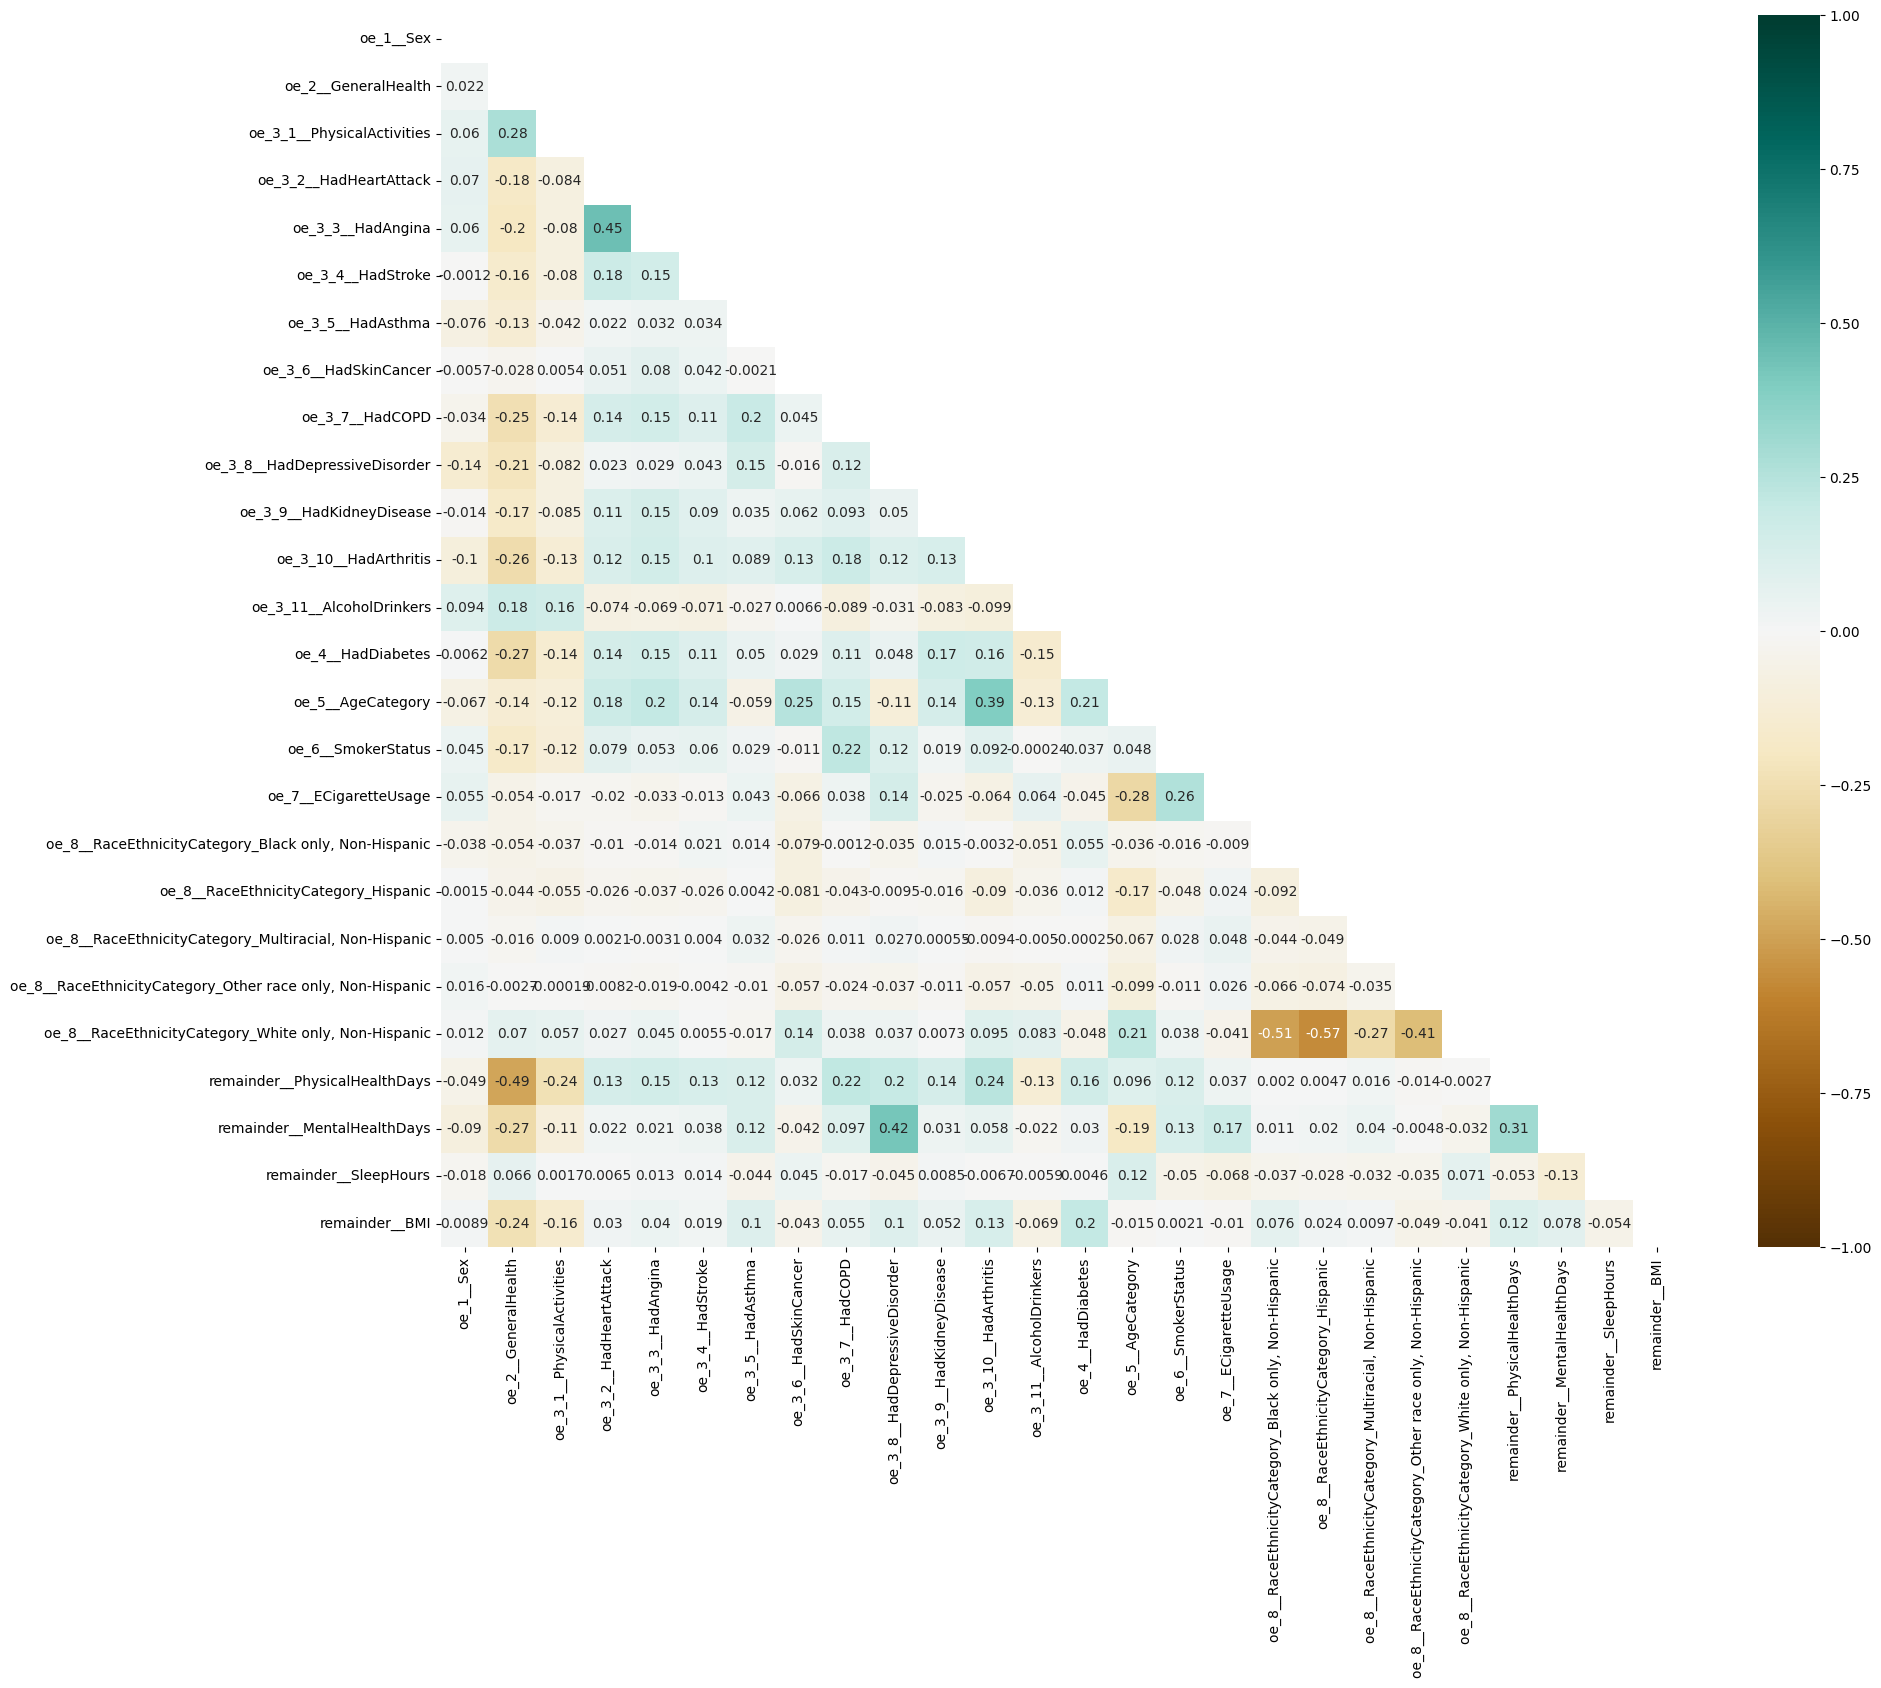

In [36]:
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_1, mask=mask, vmin=-1, vmax=1, ax=ax, annot=True, cmap='BrBG')

# Ratio of Heart disease by Categorical feature

In [55]:
df_categorical_1 = df_2.loc[:,categorical_features+target]
test = df_categorical_1.loc[:,['Sex']+target][(df_categorical_1['Sex'] == 'Female')].groupby('HadHeartAttack').count()
test

Sex
HadHeartAttack        
No              163214
Yes               6462

In [57]:
(test.loc['Yes'] / test.loc['No']).values

array([0.03959219])

In [54]:
df_categorical_1['Sex'].unique()

array(['Female', 'Male'], dtype=object)